# Homework 2 - Soccer analytics


## Libraries

In [1]:
#We import the necessary libraries to organize data and plot the Premier League ranking 2017/2018.
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data

In [9]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_England.json', 'r') as file:
    data = file.read()
matches = json.loads(data)
matches = pd.DataFrame(matches)


In [10]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\teams.json', 'r') as teams:
    data = teams.read()
teams = json.loads(data)
teams = pd.DataFrame(teams)


In [2]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\players.json', 'r') as myfile:
    data = myfile.read()
play = json.loads(data)
players = pd.DataFrame(play)


In [12]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\coaches.json', 'r') as myfile:
    data = myfile.read()
co = json.loads(data)
coaches = pd.DataFrame(co)

# Exploratory Data Analysis
All the analysis from RQ1 to RQ5, are performed only over the Premier League dataset.

# [RQ1] Who wants to be a Champion?


### Create a plot where each point (x,y) represents the number of points obtained by team x at game week y.
For this task, we need the dataframes matches and teams.
In this exploratory data analysis (RQ1 - RQ5), we will use only the datasets relative to the Premier League season 2017/2018.

We load the 'matches_England' and 'teams' json files, and produce the pandas dataframe

In [27]:
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [28]:
teams.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


#### Create a dataframe of all the Premier League teams
We will produce a new dataframe 'english' from 'teams' to get rid of all the useless information, keeping only the rows with area tag {'name': 'England'}

In [29]:
english = teams[teams['area'] == {"name": "England", "id": "0", "alpha3code": "XEN", "alpha2code": ""}]
english.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646


In [30]:
len(english.index) #Counting the rows

19

Here we notice that the teams are only 19, instead of 20, which means that there must be another Premier League team with a different area tag.

In fact, looking at the official list of English teams, we notice that Swansea City is missing.

In [31]:
# We search for a team with 'name' value 'Swansea City'
sw = teams.loc[teams['name'] == 'Swansea City']
sw

,area,city,name,officialName,type,wyId
19,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531


There it is. So we can add it to our english dataframe.

In [32]:
english = english.append(sw)
english

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646
54,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631
55,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633
56,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639
60,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644
65,"{'name': 'England', 'id': '0', 'alpha3code': '...",Liverpool,Everton,Everton FC,club,1623


We create a dataframe with only the columns 'name' and 'wyId', that are what we need to complete our task.

In [33]:
Engteam = pd.DataFrame(english['name'])
Engteam['code'] = english['wyId']
Engteam = Engteam.sort_values('code') #sorting values by 'code'
Engteam = Engteam.reset_index(drop=True) #reindexing

Engteam.head()

,name,code
0,Arsenal,1609
1,Chelsea,1610
2,Manchester United,1611
3,Liverpool,1612
4,Newcastle United,1613


From the dataframe 'matches' we only need the 'gameweek' and 'winner' columns, so we create the Premier dataframe.

In [34]:
Premier = pd.DataFrame(matches['gameweek'])
Premier['winner'] = matches['winner']
Premier['result'] = matches['label']
Premier = Premier.sort_values('gameweek')
Premier = Premier.reset_index(drop=True)

Premier[:8]

,gameweek,winner,result
0,1,1609,"Arsenal - Leicester City, 4 - 3"
1,1,1611,"Manchester United - West Ham United, 4 - 0"
2,1,1624,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,1625,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,1646,"Chelsea - Burnley, 2 - 3"
5,1,0,"Watford - Liverpool, 3 - 3"
6,1,1623,"Everton - Stoke City, 1 - 0"
7,1,0,"Southampton - Swansea City, 0 - 0"


So in the 'gameweek' column we can see the week where the match was disputed, and in 'winner' the wyId code of the winning team. It's worth of notice that if there's a draw the code value is 0.

#### Creating the ranking with all the points of each team during the 38 weeks of the season.

We start by adding 38 week columns to the Engteam dataframe.

In [30]:
for i in range(1,39):
    Engteam['week {}'.format(i)] = 0
Engteam.head()

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Arsenal,1609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chelsea,1610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manchester United,1611,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Liverpool,1612,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Newcastle United,1613,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Creating copy dataframes to avoid damaging the original ones
E = Engteam.copy()
P = Premier.copy()

Now we are ready to complete the E dataframe with all the results.

In [32]:
for i in range(380): #There are 380 total matches in the league.
    if P['winner'][i] != 0: #If there is not a draw
        
        #Adding 3 as value if the wyId code is the same as the 'winner' code in P
        E.loc[E['code'] == P['winner'][i], ['week {}'.format(P['gameweek'][i])]] = 3
        
    else:
        for j in range(20):
            
            if E['name'][j] in P['result'][i]:#If the team name is in the 'result' value
                E.at[j, 'week {}'.format(P['gameweek'][i])] = 1
E

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Arsenal,1609,3,0,0,3,1,3,3,0,...,0,3,0,3,3,0,3,0,3,3
1,Chelsea,1610,0,3,3,3,1,3,0,0,...,0,3,3,0,1,3,1,3,3,0
2,Manchester United,1611,3,3,3,1,3,3,3,1,...,3,3,1,3,3,0,3,3,0,3
3,Liverpool,1612,1,3,3,0,1,3,1,1,...,3,0,3,3,1,3,1,1,0,3
4,Newcastle United,1613,0,0,3,3,3,0,1,1,...,0,3,0,3,3,3,0,0,0,3
5,Southampton,1619,1,3,1,0,3,0,0,1,...,1,0,3,0,0,0,1,3,1,0
6,Everton,1623,3,1,0,0,0,3,0,1,...,0,1,3,0,1,1,3,3,1,0
7,Tottenham Hotspur,1624,3,0,1,3,1,3,3,3,...,3,3,3,3,3,0,1,3,0,3
8,Manchester City,1625,3,1,3,3,3,3,3,3,...,3,3,3,3,0,3,3,3,1,3
9,West Bromwich Albion,1627,3,3,1,0,1,0,1,1,...,0,0,0,0,1,3,1,3,3,0


#### Creating the plot

In [33]:
E = E.loc[:, 'week 1':] #we remove the 'names' and 'code' columns, we don't need them anymore


Now, we need to list of the result of each team so that we can sum them and plot the summed result of each team.

In [34]:
Graf = E.values.tolist()
Grafv = list(Graf)


In [35]:
for i in range(20):
    for j in range(1,38):
        Grafv[i][j] = Graf[i][j-1] + Graf[i][j] #Summing every week result with the past ones


We can finally plot. 

In [36]:
wg = []
for i in range(1,39):
    wg.append('{}'.format(i)) # x ticks of every week

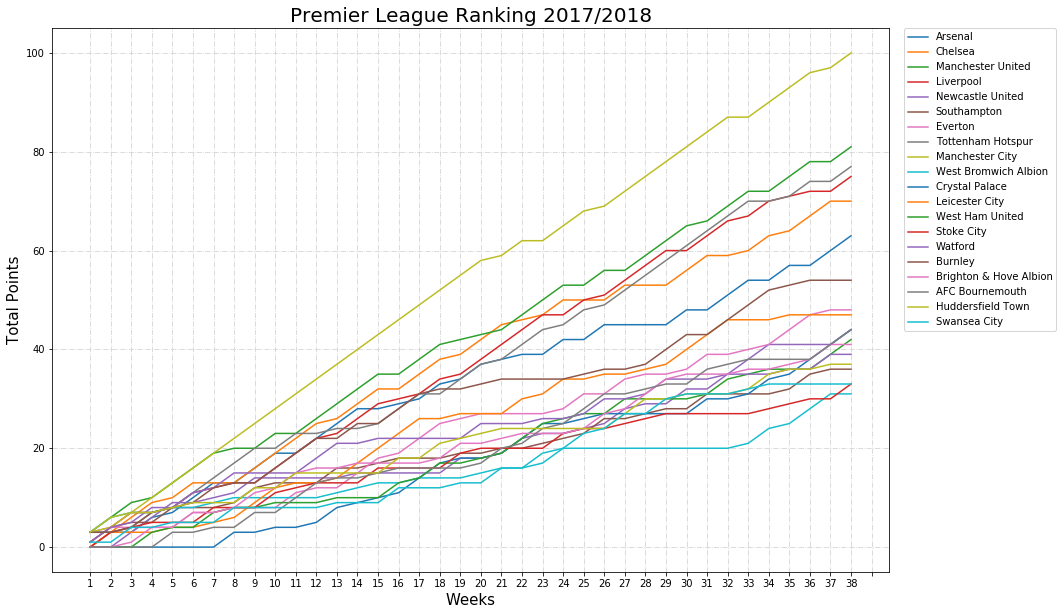

In [37]:
plt.figure(figsize=(15,10))
for i in range(20):
    plt.plot(Grafv[i], label = Engteam['name'][i])
    
plt.xticks(range(0,39),wg, size = 10)
plt.ylabel("Total Points", size = 15)
plt.xlabel("Weeks", size = 15)
plt.grid(color ='lightgray', linestyle = '-.')
plt.title('Premier League Ranking 2017/2018', size = 20)

plt.legend(loc='center right',bbox_to_anchor=(1.20,0.7211), borderaxespad=0,prop={'size': 10});

#### Finding the two best and worst teams

We now define a function to find the teams with most consecutive wins and losses. 

In [38]:
def bestornot(n):
    r = E.values.tolist()
    for i in range(len(r)):
        r[i] = [str(x) if x == n else ' ' for x in r[i]] #everything different from n becomes a space ' '
        r[i] = ''.join(r[i])#getting rid of spaces
        r[i] = r[i].split()#creating the list r[i] modified
        r[i] = max(r[i])#choosing the max value in r[i]
    
    return r


In [39]:
bestornot(3)#most consecutive wins for team in the season

['333',
 '3333',
 '3333',
 '3333',
 '333',
 '3',
 '33',
 '3333333',
 '333333333333333333',
 '33',
 '333',
 '3333',
 '33',
 '3',
 '33',
 '333',
 '33',
 '33',
 '33',
 '33']

In [40]:
Engteam.at[8, 'name']#best team

'Manchester City'

In [41]:
Engteam.at[7, 'name']#second best

'Tottenham Hotspur'

Now, we can do the same with losses:

In [42]:
bestornot(0)#most consecutive losses for team in the season

['000',
 '00',
 '0',
 '0',
 '0000',
 '000',
 '000',
 '0',
 '0',
 '00000000',
 '0000000',
 '000',
 '000',
 '0000',
 '0000',
 '000',
 '000',
 '0000',
 '00000',
 '0000']

In [43]:
Engteam.at[9,'name']#worst team

'West Bromwich Albion'

In [44]:
Engteam.at[10,'name']#second worst

'Crystal Palace'

# [RQ2] Is there a home-field advantage?

In [13]:
matches
#let's watch our dataframe

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093
5,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Newcastle United - Chelsea, 3 - 0","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1613': {'scoreET': 0, 'coachId': 210700, 'si...",St. James' Park,1613,2500094
6,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Southampton - Manchester City, 0 - 1","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",St. Mary's Stadium,1625,2500095
7,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Swansea City - Stoke City, 1 - 2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'10531': {'scoreET': 0, 'coachId': 32573, 'si...",Liberty Stadium,1639,2500096
8,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Tottenham Hotspur - Leicester City, 5 - 4","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1631': {'scoreET': 0, 'coachId': 209010, 'si...",Wembley Stadium,1624,2500097
9,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"West Ham United - Everton, 3 - 1","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",London Stadium,1633,2500098


In [14]:
matches.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId'],
      dtype='object')

In [15]:
workingData = matches['label']
workingData.head()
#we are interested in label because it gives the info of the teams that were playing and the result of the game

0                Burnley - AFC Bournemouth, 1 - 2
1    Crystal Palace - West Bromwich Albion, 2 - 0
2              Huddersfield Town - Arsenal, 0 - 1
3       Liverpool - Brighton & Hove Albion, 4 - 0
4              Manchester United - Watford, 1 - 0
Name: label, dtype: object

I will split this columns in teams and result to have a better view and accessibility of the info in every row.

In [16]:
wkd = pd.DataFrame(workingData)
wkd.head()

,label
0,"Burnley - AFC Bournemouth, 1 - 2"
1,"Crystal Palace - West Bromwich Albion, 2 - 0"
2,"Huddersfield Town - Arsenal, 0 - 1"
3,"Liverpool - Brighton & Hove Albion, 4 - 0"
4,"Manchester United - Watford, 1 - 0"


In [17]:
new = wkd["label"].str.split(",", n = 1, expand = True)
new.head()
#we created a table with the match and the result, now we can split for HomeMatch and NotHomeMatch

,0,1
0,Burnley - AFC Bournemouth,1 - 2
1,Crystal Palace - West Bromwich Albion,2 - 0
2,Huddersfield Town - Arsenal,0 - 1
3,Liverpool - Brighton & Hove Albion,4 - 0
4,Manchester United - Watford,1 - 0


In [18]:
new.rename(columns = {0 :'Match',1 :'Result'}, inplace = True)

In [19]:
new.columns

Index(['Match', 'Result'], dtype='object')

In [20]:
Mtc = new["Match"].str.split("-", n = 1, expand = True)
Mtc.head()
#the teams

,0,1
0,Burnley,AFC Bournemouth
1,Crystal Palace,West Bromwich Albion
2,Huddersfield Town,Arsenal
3,Liverpool,Brighton & Hove Albion
4,Manchester United,Watford


In [21]:
Rst = new["Result"].str.split("-", n = 1, expand = True)
Rst.head()
#the goals

,0,1
0,1,2
1,2,0
2,0,1
3,4,0
4,1,0


In [22]:
alldata = pd.DataFrame({'Home':Mtc[0], 'ResH':Rst[0], 'ResNH':Rst[1],'Nhome':Mtc[1]})
alldata.head()
#this is the dataframe I wanted to organize

,Home,ResH,ResNH,Nhome
0,Burnley,1,2,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion
2,Huddersfield Town,0,1,Arsenal
3,Liverpool,4,0,Brighton & Hove Albion
4,Manchester United,1,0,Watford


Now we try to find the Winner, or Draw, for every Match, so we can add this to my previous table in a column called 'Winner'

In [23]:
l = []
for i in range(len(alldata)):
    a = int(alldata.loc[i,'ResH'])
    b = int(alldata.loc[i,'ResNH'])
    #print(a,b)
    if a==b:
       # print('1')
        l.append('Draw')
    elif a>b:
        l.append(alldata.loc[i,'Home'])
       #print('2')
    elif a<b:
        l.append(alldata.loc[i,'Nhome'])
       # print('3')
    
l

[' AFC Bournemouth',
 'Crystal Palace ',
 ' Arsenal',
 'Liverpool ',
 'Manchester United ',
 'Newcastle United ',
 ' Manchester City',
 ' Stoke City',
 'Tottenham Hotspur ',
 'West Ham United ',
 'Draw',
 'Manchester City ',
 'Tottenham Hotspur ',
 'Leicester City ',
 'Draw',
 ' Southampton',
 'Arsenal ',
 'Chelsea ',
 'Draw',
 'Draw',
 'AFC Bournemouth ',
 ' West Ham United',
 'Watford ',
 'West Bromwich Albion ',
 ' Crystal Palace',
 'Brighton & Hove Albion ',
 'Tottenham Hotspur ',
 'Manchester United ',
 ' Manchester City',
 ' Chelsea',
 'Draw',
 'Crystal Palace ',
 ' Everton',
 ' West Bromwich Albion',
 'Southampton ',
 'Draw',
 'Everton ',
 'Manchester City ',
 'Arsenal ',
 'Draw',
 'Draw',
 'Draw',
 ' Chelsea',
 'Draw',
 ' Manchester United',
 'Draw',
 'Draw',
 ' West Bromwich Albion',
 'Newcastle United ',
 ' Manchester City',
 'Liverpool ',
 'Burnley ',
 'Crystal Palace ',
 'Huddersfield Town ',
 'Draw',
 ' Chelsea',
 'Draw',
 'Arsenal ',
 ' Manchester United',
 'Draw',
 'Draw

In [24]:
alldata['Winner']=l

Here it is the table that we were building.

In [25]:
alldata = alldata.reset_index(drop=True)

Now we use the teams dataset

To be casual in my indipendence test we'll take out 5 random team from the english teams, so we start from taking out every team in a column and then extract 5 casual numbers that will be the row of the casually selected team.

In [35]:
allteams = (pd.DataFrame(Engteam['name'])).reset_index(drop=True)
allteams

,name
0,Arsenal
1,Chelsea
2,Manchester United
3,Liverpool
4,Newcastle United
5,Southampton
6,Everton
7,Tottenham Hotspur
8,Manchester City
9,West Bromwich Albion


We select 5 random teams

In [36]:
import random
selected_teams = random.sample(range(19),5)
selected_teams

[1, 3, 8, 13, 7]

These are our teams:

In [37]:
B = []
for i in selected_teams:
    B.append(str(allteams.loc[i,'name']))
B

['Chelsea', 'Liverpool', 'Manchester City', 'Stoke City', 'Tottenham Hotspur']

## For 5 different teams of Premier League, show the contingency table (outcome x side).

Here we'll illustrate the process to create a contingency table for the first team, for the others there is a cell with the compact code of this procedure

In [38]:
home = alldata[alldata['Home'].str.contains(B[0])]
home
# select the rows that have in home the team that I have to analyze

,Home,ResH,ResNH,Nhome,Winner
14,Chelsea,1,1,Huddersfield Town,Draw
17,Chelsea,1,0,Liverpool,Chelsea
56,Chelsea,1,1,West Ham United,Draw
66,Chelsea,1,3,Tottenham Hotspur,Tottenham Hotspur
83,Chelsea,2,1,Crystal Palace,Chelsea
110,Chelsea,3,0,West Bromwich Albion,Chelsea
133,Chelsea,0,3,AFC Bournemouth,AFC Bournemouth
154,Chelsea,0,0,Leicester City,Draw
175,Chelsea,5,0,Stoke City,Chelsea
184,Chelsea,2,0,Brighton & Hove Albion,Chelsea


In [39]:
not_home = alldata[alldata['Nhome'].str.contains(B[0])]
alldata[alldata['Nhome'].str.contains(B[0])]
# select the rows that have in Nhome the team that I have to analyze

,Home,ResH,ResNH,Nhome,Winner
5,Newcastle United,3,0,Chelsea,Newcastle United
29,Swansea City,0,1,Chelsea,Chelsea
42,Burnley,1,2,Chelsea,Chelsea
55,Southampton,2,3,Chelsea,Chelsea
91,Manchester City,1,0,Chelsea,Manchester City
101,Manchester United,2,1,Chelsea,Manchester United
120,Watford,4,1,Chelsea,Watford
149,Brighton & Hove Albion,0,4,Chelsea,Chelsea
161,Arsenal,2,2,Chelsea,Draw
198,Everton,0,0,Chelsea,Draw


In [40]:
home['Winner'].str.replace(" ","")
not_home['Winner'].str.replace(" ","")
home

,Home,ResH,ResNH,Nhome,Winner
14,Chelsea,1,1,Huddersfield Town,Draw
17,Chelsea,1,0,Liverpool,Chelsea
56,Chelsea,1,1,West Ham United,Draw
66,Chelsea,1,3,Tottenham Hotspur,Tottenham Hotspur
83,Chelsea,2,1,Crystal Palace,Chelsea
110,Chelsea,3,0,West Bromwich Albion,Chelsea
133,Chelsea,0,3,AFC Bournemouth,AFC Bournemouth
154,Chelsea,0,0,Leicester City,Draw
175,Chelsea,5,0,Stoke City,Chelsea
184,Chelsea,2,0,Brighton & Hove Albion,Chelsea


Now we create 6 values indicating the number of wins, losses or draws playing at home or not home.

In [41]:
Whome = len(home[home['Winner'].str.contains(B[0])])
#Whome
Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
Lhome = len(home)-Whome-Dhome
#print(Whome,Dhome,Lhome)

In [42]:
Wout = len(not_home[not_home['Winner'].str.contains(B[0])])
#Whome
Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
Lout = len(not_home)-Wout-Dout

In [43]:
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)

In [44]:
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}

In [45]:
Sa = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[0])))

In [46]:
Sa
#this is the table for the first team

,Win,Loss,Draw,Total
Chelsea,,,,
Home,11,4,4,19
Not Home,10,6,3,19
Total,21,10,7,38


As we said here we'll do the same for the five teams in a for loop, later are diplayed the tables for every team.

In [47]:
Sa = []
for i in range(0,5):
    home = alldata[alldata['Home'].str.contains(B[i])]
    not_home = alldata[alldata['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    Whome = len(home[home['Winner'].str.contains(B[i])])
#Whome
    Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
    Lhome = len(home)-Whome-Dhome
    Wout = len(not_home[not_home['Winner'].str.contains(B[i])])
#Whome
    Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
    Lout = len(not_home)-Wout-Dout
    W = np.array([Whome,Wout, Whome + Wout],dtype = object)
    L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
    D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
    T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
    raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
    Sa.append(pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[i]))))

In [48]:
Sa[0]
#1st team

,Win,Loss,Draw,Total
Chelsea,,,,
Home,11,4,4,19
Not Home,10,6,3,19
Total,21,10,7,38


In [49]:
Sa[1]
#2nd team

,Win,Loss,Draw,Total
Liverpool,,,,
Home,12,0,7,19
Not Home,9,5,5,19
Total,21,5,12,38


In [50]:
Sa[2]
#3rd team

,Win,Loss,Draw,Total
Manchester City,,,,
Home,16,1,2,19
Not Home,16,1,2,19
Total,32,2,4,38


In [51]:
Sa[3]
#4th team

,Win,Loss,Draw,Total
Stoke City,,,,
Home,5,9,5,19
Not Home,2,10,7,19
Total,7,19,12,38


In [52]:
Sa[4]
#5th team

,Win,Loss,Draw,Total
Tottenham Hotspur,,,,
Home,13,2,4,19
Not Home,10,5,4,19
Total,23,7,8,38


## Second part-X^2 test

We start saving the results of everyone of the 5 teams without intersections with each other, then create a unique contingency table with the summed values.

In [53]:
print(B)

['Chelsea', 'Liverpool', 'Manchester City', 'Stoke City', 'Tottenham Hotspur']


In [54]:
alldata.head()

,Home,ResH,ResNH,Nhome,Winner
0,Burnley,1,2,AFC Bournemouth,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion,Crystal Palace
2,Huddersfield Town,0,1,Arsenal,Arsenal
3,Liverpool,4,0,Brighton & Hove Albion,Liverpool
4,Manchester United,1,0,Watford,Manchester United


In [55]:
alldata1 = alldata[~alldata['Home'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[4])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[4])]
alldata1
#the dataset from which we take the results of team 1

,Home,ResH,ResNH,Nhome,Winner
0,Burnley,1,2,AFC Bournemouth,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion,Crystal Palace
2,Huddersfield Town,0,1,Arsenal,Arsenal
4,Manchester United,1,0,Watford,Manchester United
5,Newcastle United,3,0,Chelsea,Newcastle United
9,West Ham United,3,1,Everton,West Ham United
10,West Ham United,0,0,Manchester United,Draw
13,Leicester City,3,1,Arsenal,Leicester City
14,Chelsea,1,1,Huddersfield Town,Draw
15,Swansea City,0,1,Southampton,Southampton


In [56]:
alldata2 = alldata[~alldata['Home'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[4])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[4])]
alldata2.head()
#the dataset from which we take the results of team 2

,Home,ResH,ResNH,Nhome,Winner
0,Burnley,1,2,AFC Bournemouth,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion,Crystal Palace
2,Huddersfield Town,0,1,Arsenal,Arsenal
3,Liverpool,4,0,Brighton & Hove Albion,Liverpool
4,Manchester United,1,0,Watford,Manchester United


In [57]:
alldata3 = alldata[~alldata['Home'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[4])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[4])]
alldata3.head()
#the dataset from which we take the results of team 3

,Home,ResH,ResNH,Nhome,Winner
0,Burnley,1,2,AFC Bournemouth,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion,Crystal Palace
2,Huddersfield Town,0,1,Arsenal,Arsenal
4,Manchester United,1,0,Watford,Manchester United
6,Southampton,0,1,Manchester City,Manchester City


In [58]:
alldata4 = alldata[~alldata['Home'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[4])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[4])]
alldata4.head()
#the dataset from which we take the results of team 4 B[3]

,Home,ResH,ResNH,Nhome,Winner
0,Burnley,1,2,AFC Bournemouth,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion,Crystal Palace
2,Huddersfield Town,0,1,Arsenal,Arsenal
4,Manchester United,1,0,Watford,Manchester United
7,Swansea City,1,2,Stoke City,Stoke City


In [59]:
alldata5 = alldata[~alldata['Home'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[3])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[3])]
alldata5.head()
#the dataset from which we take the results of team 5

,Home,ResH,ResNH,Nhome,Winner
0,Burnley,1,2,AFC Bournemouth,AFC Bournemouth
1,Crystal Palace,2,0,West Bromwich Albion,Crystal Palace
2,Huddersfield Town,0,1,Arsenal,Arsenal
4,Manchester United,1,0,Watford,Manchester United
8,Tottenham Hotspur,5,4,Leicester City,Tottenham Hotspur


Now I do the same process of before but every time I sum the result of every team in a unique contingency table called CTtotal

In [60]:
vec = {B[0]:alldata1, B[1] :alldata2, B[2]: alldata3, B[3]:alldata4,B[4]: alldata5}

In [61]:
Whome=0
Dhome=0
Lhome=0
Wout=0
Dout=0
Lout=0
for i in range(len(B)):
    home = vec[B[i]][vec[B[i]]['Home'].str.contains(B[i])]
    not_home = vec[B[i]][vec[B[i]]['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    WH1=len(home[home['Winner'].str.contains(B[i])])
    DH1=len(home[home['Winner'].str.contains('Draw')])
    Whome = Whome +WH1
    Dhome =Dhome + DH1
    Lhome = Lhome +len(home)-WH1-DH1
    WO=len(not_home[not_home['Winner'].str.contains(B[i])])
    DO=len(not_home[not_home['Winner'].str.contains('Draw')])
    Wout = Wout + WO
    Dout =Dout + DO
    Lout = Lout +len(not_home)-WO-DO
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
CTtotal = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = 'The five Teams'))
CTtotal

,Win,Loss,Draw,Total
The five Teams,,,,
Home,48,8,19,75
Not Home,39,18,18,75
Total,87,26,37,150


In [62]:
#To be clear the Teams were 
print(B)

['Chelsea', 'Liverpool', 'Manchester City', 'Stoke City', 'Tottenham Hotspur']


In [63]:
CT = CTtotal.drop(columns = ['Total'])
CT = CT.drop('Total')
CT

,Win,Loss,Draw
The five Teams,,,
Home,48,8,19
Not Home,39,18,18


In [64]:
from scipy.stats import chi2_contingency

In [65]:
#Assumption of independence
chi2, p, dof, expec = chi2_contingency(CT)

In [66]:
chi2

4.804215355939494

In [67]:
p

0.09052695041478716

In [68]:
dof

2

In [69]:
expec

array([[43.5, 13. , 18.5],
       [43.5, 13. , 18.5]])

We put a singificance of 5% and there are 2 degrees of freedom, so, from the X^2 squared table, the X^2 should not be greater than 5.99, so being 4.8 and having so small p-value we can confirm the hypotesis of INDIPENDENCE, there is not a home field advantage!

# [RQ3] Which teams have the youngest coaches?

Let's start analyzing the coaches database, we'll see that we can find the info about every birthDate and an Id(wyId)

In [70]:
coaches

,birthArea,birthDate,currentTeamId,firstName,lastName,middleName,passportArea,shortName,wyId
0,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",None,0,César Domingo,Mendiondo López,,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",Cesar Domingo,275580
1,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1945-05-09,0,Josef,Heynckes,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",J. Heynckes,14710
2,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1956-06-16,0,Giovanni,De Biasi,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",G. De Biasi,135480
3,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1965-08-14,674,Marcelino,García Toral,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Marcelino,210074
4,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1974-04-02,0,Tayfun,Korkut,,"{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",T. Korkut,293398
5,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1964-02-09,676,Ernesto,Valverde Tejedor,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Ernesto Valverde,92894
6,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1967-04-22,0,Juan Carlos,Unzué Labiano,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Unzué,3880
7,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1967-12-29,0,Dirk,Schuster,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",D. Schuster,17121
8,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1969-07-31,0,Antonio,Conte,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",A. Conte,20454
9,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",1958-02-10,0,Ricardo Alberto,Gareca Nardi,,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",R. Gareca,86604


In [71]:
data1 = pd.concat([coaches['birthDate'],coaches['shortName'], coaches['wyId']], axis = 1)
data1
#here i create a dataset more accessible in which I'll find in a row birthDate, shortName and wyId for every coach

,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
1,1945-05-09,J. Heynckes,14710
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
4,1974-04-02,T. Korkut,293398
5,1964-02-09,Ernesto Valverde,92894
6,1967-04-22,Unzué,3880
7,1967-12-29,D. Schuster,17121
8,1969-07-31,A. Conte,20454
9,1958-02-10,R. Gareca,86604


In [72]:
Dickus = pd.Series(data1.shortName.values,index=data1.wyId).to_dict()
Dickus
#Dickus is a dictionary in which I associated every wyid with its coach

{275580: 'Cesar Domingo',
 14710: 'J. Heynckes',
 135480: 'G. De Biasi',
 210074: 'Marcelino',
 293398: 'T. Korkut',
 92894: 'Ernesto Valverde',
 3880: 'Unzué',
 17121: 'D. Schuster',
 20454: 'A. Conte',
 86604: 'R. Gareca',
 259751: 'M. Gisdol',
 142913: 'G. Rohr',
 15114: 'D. Hecking',
 21061: 'V. Montella',
 20603: 'G. Iachini',
 14735: 'B. Labbadia',
 210205: 'L. Lagerbäck',
 225952: 'Fran Escribá',
 26812: 'C. Pélissier',
 251025: 'S. Inzaghi',
 25691: 'R. Garcia',
 210152: 'L. Delneri',
 20386: 'M. Allegri',
 18702: 'M. Schmidt',
 295160: 'Pako Ayestarán',
 230918: 'Abelardo',
 116503: 'D. Alonso',
 18987: 'P. Dárdai',
 210700: 'Rafael Benítez',
 18572: 'D. Wagner',
 69952: 'A. Čačić',
 86569: 'Pizzi',
 355598: 'Imanol Alguacil',
 210513: 'P. Garande',
 23551: 'M. Rastelli',
 32573: 'Carlos Carvalhal',
 210902: 'B. Storck',
 15824: 'R. Hasenhüttl',
 4258: 'Paco Jémez',
 9454: 'G. Megson',
 167037: 'Pepe Mel',
 210121: 'M. Giampaolo',
 228386: 'C. Titz',
 112633: 'J. Osorio',
 246

In [73]:
matches.head()
#now let's remember that in matches I have the column 'teamsData' in which there is a dictionary with 2 keys(the teams id) and values a dictionary with various info and also the wyId for the coach of the team.

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [74]:
matches.loc[0]['teamsData']

{'1646': {'scoreET': 0,
  'coachId': 8880,
  'side': 'home',
  'teamId': 1646,
  'score': 1,
  'scoreP': 0,
  'hasFormation': 1,
  'formation': {'bench': [{'playerId': 77502,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 270828,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 9164,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 8516,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 9179,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 532949,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 9127,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'}],
   'lineup': [{'playerId': 9206,
     

We want to take out the coachId from this table, but being associated with a team-code, we start creating a dataset with Team and code.

In [75]:
squadre = pd.DataFrame(teams['name'])
squadre['code'] = teams['wyId']
sw = teams.loc[teams['name'] == 'Swansea City']
english = teams[teams['area'] == {"name": "England", "id": "0", "alpha3code": "XEN", "alpha2code": ""}]
english = english.append(sw)
english
Engteam = pd.DataFrame(english['name'])
Engteam['code'] = english['wyId']
Engteam = Engteam.sort_values('code')
Engteam = Engteam.reset_index(drop=True)
EngDic = pd.Series(Engteam.name.values,index=Engteam.code).to_dict()
Engteam

,name,code
0,Arsenal,1609
1,Chelsea,1610
2,Manchester United,1611
3,Liverpool,1612
4,Newcastle United,1613
5,Southampton,1619
6,Everton,1623
7,Tottenham Hotspur,1624
8,Manchester City,1625
9,West Bromwich Albion,1627


In [76]:
EngDic
#to access easily the coach when I find the youngest and the team code.

{1609: 'Arsenal',
 1610: 'Chelsea',
 1611: 'Manchester United',
 1612: 'Liverpool',
 1613: 'Newcastle United',
 1619: 'Southampton',
 1623: 'Everton',
 1624: 'Tottenham Hotspur',
 1625: 'Manchester City',
 1627: 'West Bromwich Albion',
 1628: 'Crystal Palace',
 1631: 'Leicester City',
 1633: 'West Ham United',
 1639: 'Stoke City',
 1644: 'Watford',
 1646: 'Burnley',
 1651: 'Brighton & Hove Albion',
 1659: 'AFC Bournemouth',
 1673: 'Huddersfield Town',
 10531: 'Swansea City'}

Now we can find the Team, given the code.
Now let's start digging in the coach's id and respective team for the matches.

In [77]:
l=[]
M = []
for key in matches.teamsData:
    for keys in key:
        l.append(key[keys]['coachId'])
for key in matches.teamsData:
    for keys in key:
            M.append(keys)
data3 = pd.DataFrame({'coachId':l,'Team':M})
data3 =data3.drop_duplicates()
#coaches played more than one match with a team so there would be many repeted rows that I cancel with drop_duplicates
data3 = data3
data3.head()
#here we have a dataset with coach and Team, some coachId will repete but the team will be different(ando also the reverse)

,coachId,Team
0,8880,1646
1,8934,1659
2,8357,1628
3,0,1627
4,7845,1609


In the dataset of matches many times we find some coachId = 0 due of errors maybe in the creation of the dataset. Knowing this and that every row is a match, being the zeros casual, it will be normal to find in 38 games for every team one value different from zero referring to the coach that would not be changed for only one week, so we cancel the rows with the zeros because the right coach will be in some others.

In [78]:
data3 = data3[data3['coachId']!= 0]
data3 = data3.reset_index(drop=True)
data3

,coachId,Team
0,8880,1646
1,8934,1659
2,8357,1628
3,7845,1609
4,18572,1673
5,8093,1651
6,14791,1612
7,93112,1644
8,3295,1611
9,210700,1613


In [79]:
#Now we create a dictionary with keys as their wyId and values the team's Id they worked with(like 9054 they can be multiple!)
Dick = pd.Series(data3.Team.values,index=data3.coachId).to_dict()
Dick1 = {}
for row in range(len(data3)):
    if data3.coachId[row] in Dick1 and Dick1[data3.coachId[row]]!=data3.Team[row]:
        Dick1[data3.coachId[row]].append(data3.Team[row])
    else:
         Dick1[data3.coachId[row]] = [(data3.Team[row])]
Dick1

{8880: ['1646'],
 8934: ['1659'],
 8357: ['1628'],
 7845: ['1609'],
 18572: ['1673'],
 8093: ['1651'],
 14791: ['1612'],
 93112: ['1644'],
 3295: ['1611'],
 210700: ['1613'],
 272869: ['1610'],
 267136: ['1625'],
 9054: ['1619', '1639'],
 32573: ['10531'],
 8329: ['1639'],
 209010: ['1631'],
 3782: ['1624'],
 8541: ['1623'],
 8235: ['1633'],
 292863: ['1624'],
 20454: ['1610'],
 7973: ['1627'],
 254174: ['1619'],
 71037: ['1644'],
 381291: ['10531'],
 434992: ['1623'],
 9454: ['1627'],
 149026: ['1627'],
 269869: ['1633'],
 268779: ['1623'],
 8214: ['1631'],
 333782: ['1631'],
 531745: ['1613'],
 268775: ['1628']}

Now I have the coaches and easily accessible their Teamcode.

In [80]:
Mist = []
for key in Dick1:
    Mist.append(key)
Mist
#We create a list with inside the coaches wyId

[8880,
 8934,
 8357,
 7845,
 18572,
 8093,
 14791,
 93112,
 3295,
 210700,
 272869,
 267136,
 9054,
 32573,
 8329,
 209010,
 3782,
 8541,
 8235,
 292863,
 20454,
 7973,
 254174,
 71037,
 381291,
 434992,
 9454,
 149026,
 269869,
 268779,
 8214,
 333782,
 531745,
 268775]

In [81]:
#form data1 I select only the rows with the coaches for the teams I need to analyze(England)
data4 = data1[data1['wyId'].isin(Mist)]
data4.head()

,birthDate,shortName,wyId
8,1969-07-31,A. Conte,20454
28,1960-04-16,Rafael Benítez,210700
29,1971-10-19,D. Wagner,18572
35,1965-12-04,Carlos Carvalhal,32573
39,1959-05-02,G. Megson,9454


In [82]:
data4.loc['birthDate'] =pd.to_datetime(data4.birthDate)
data5 = data4.sort_values('birthDate', ascending = False)
data5 = data5.reset_index(drop = True)
data5
#here we have data4 ordered and called data5, the first coach is the youngest!

C:\Users\Notebook HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,birthDate,shortName,wyId
0,1977-11-29,E. Howe,8934
1,1977-07-12,Marco Silva,71037
2,1975-12-04,M. Appleton,8214
3,1973-10-16,D. Unsworth,434992
4,1973-02-19,Paco,531745
5,1972-03-02,M. Pochettino,292863
6,1972-01-08,P. Clement,381291
7,1971-10-19,D. Wagner,18572
8,1971-10-05,M. Pellegrino,254174
9,1971-06-28,S. Dyche,8880


In [83]:
print('Those are the coaches in ascending order of age, from the youngest:\n')
for i in range(10):
    print('Coach',Dickus[data5.wyId[i]],'for Team',EngDic[int(''.join(Dick1[data5.wyId[i]]))], '\n' )

Those are the coaches in ascending order of age, from the youngest:

Coach E. Howe for Team AFC Bournemouth 

Coach Marco Silva for Team Watford 

Coach M. Appleton for Team Leicester City 

Coach D. Unsworth for Team Everton 

Coach Paco for Team Newcastle United 

Coach M. Pochettino for Team Tottenham Hotspur 

Coach P. Clement for Team Swansea City 

Coach D. Wagner for Team Huddersfield Town 

Coach M. Pellegrino for Team Southampton 

Coach S. Dyche for Team Burnley 



In [84]:
data6=data5.copy()
l = []
for i in range(33):
    l.append((pd.to_datetime('today').year-pd.to_datetime(data5["birthDate"][i]).year))
Ages = pd.DataFrame(l)
Ages.rename(columns ={0 : 'Age of Coaches'}, inplace = True)
Ages

,Age of Coaches
0,42
1,42
2,44
3,46
4,46
5,47
6,47
7,48
8,48
9,48


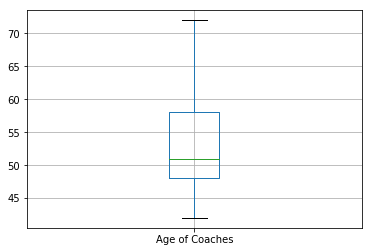

In [85]:
boxplot = Ages.boxplot(column=['Age of Coaches'])

So this is the boxplot showing the distribution of the ages of all coaches of the season and then the median is a value between 50 years and 55 years.

# [RQ4] Find the top 10 players with the highest ratio between completed passes and attempted passes.

In [39]:
with open(r"C:\Users\Nino\Desktop\events_England.json") as myfile :
    data = myfile.read()
events = pd.DataFrame(json.loads(data))


since in this RQ we are just interested in "pass" events, we filter the rows that has eventId=8

In [40]:
pass_events = events[events.eventId == 8]
pass_events

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609
10,8,Pass,18.051875,177959179,2499719,1H,49876,"[{'y': 61, 'x': 59}, {'y': 45, 'x': 45}]",82,Head pass,[{'id': 1801}],1609
11,8,Pass,20.426527,177959180,2499719,1H,14869,"[{'y': 45, 'x': 45}, {'y': 54, 'x': 71}]",83,High pass,[{'id': 1801}],1609


Now we want to know about accurate passes so we filter rows that contain tag id 1801

In [41]:
acc_passes = pass_events[pass_events['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(1801).any())]

In [42]:
acc_passes.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


Now we calculate the ratio of accurate passes

In [43]:
ratio = ( acc_passes["playerId"].value_counts() / pass_events["playerId"].value_counts() ).sort_values(ascending=[False])
ratio

532949    1.000000
423162    1.000000
25703     1.000000
26109     1.000000
134708    1.000000
227756    1.000000
447538    1.000000
291528    1.000000
447254    1.000000
340476    1.000000
353241    1.000000
415747    1.000000
9380      0.975914
14886     0.956522
8324      0.948020
8464      0.945076
8307      0.943206
135103    0.940217
7856      0.939914
7918      0.938505
70086     0.937584
212651    0.937500
120339    0.936451
14808     0.935556
71703     0.935528
11152     0.932601
71654     0.932449
8745      0.931818
74        0.930973
241564    0.930931
            ...   
9123      0.677262
9414      0.675302
293686    0.673203
8903      0.670000
145692    0.669811
8416      0.667297
20606     0.666667
15301     0.666667
12829     0.665037
224206    0.662791
8013      0.658537
49971     0.657321
8686      0.651685
8677      0.650510
7961      0.649402
531655    0.636364
245813    0.633136
15054     0.632780
55224     0.623529
337225    0.621622
32968     0.611940
280157    0.

As you can see some of our rows have value 1. lets evaluate one of this points :

In [44]:
print(acc_passes["playerId" ].value_counts()[26109])
print(pass_events["playerId" ].value_counts()[26109])

2
2


This player had only 2 passes and all of them were accurate so we can't judge whether he is a good palyer or not based on this information. Now we put a threshhold to solve this problem. for setting a threshold, it's good to have an initial understanding of our data:






In [ ]:
pass_events["playerId"].value_counts().describe()

As you can see the first quartile is 157 and it means that 75% of our population had more than 157 passes, also the mean is 639, so it seems fair to set the threshold equal to 157. let's see :

In [45]:
countA = pass_events.playerId.value_counts()
countB = countA[countA.apply(lambda x : x > 157)]
countB.head(10)

49876     2974
70086     2964
105339    2842
25553     2713
38021     2672
70122     2456
8317      2382
48        2370
8277      2316
54        2196
Name: playerId, dtype: int64

Now, I calculate the ratio :

In [46]:
rate = (acc_passes["playerId"].value_counts()/ countB).sort_values(ascending=[False]).dropna()
rate[0:10]

9380      0.975914
8324      0.948020
8464      0.945076
8307      0.943206
135103    0.940217
7856      0.939914
7918      0.938505
70086     0.937584
120339    0.936451
14808     0.935556
Name: playerId, dtype: float64

In [47]:
ratio = pd.DataFrame({"wyId": rate.index , "ratio" : rate.values})
ratio.head(10)

,wyId,ratio
0,9380,0.975914
1,8324,0.948020
2,8464,0.945076
3,8307,0.943206
4,135103,0.940217
5,7856,0.939914
6,7918,0.938505
7,70086,0.937584
8,120339,0.936451
9,14808,0.935556


We can also extract the name of these players

In [48]:
ratio ["Last name"] = ratio.merge(players, on = "wyId")["lastName"]

In [49]:
ratio.head(10)

,wyId,ratio,Last name
0,9380,0.975914,Stones
1,8324,0.948020,Tour\u00e9
2,8464,0.945076,Delph
3,8307,0.943206,Kompany
4,135103,0.940217,Christensen
5,7856,0.939914,Mertesacker
6,7918,0.938505,Jones
7,70086,0.937584,Otamendi
8,120339,0.936451,Elsayed Elneny
9,14808,0.935556,G\u00fcndo\u011fan


# [RQ5] Does being a tall player mean winning more air duels?

in this RQ we want to know if there is any ralations between the height of a player and winning air duels or not. We need to work on England event dataset to extract data about air duels and also players dataset to extract data about the height of players

In [23]:
with open(r"C:\Users\Nino\Desktop\events_England.json") as myfile :
    data = myfile.read()
events = pd.DataFrame(json.loads(data))

In [35]:
with open(r"C:\Users\Nino\Desktop\players.json") as myfile :
    data = myfile.read()
players = pd.DataFrame(json.loads(data))

since we want to focus on air duel events, we should filter the rows of our dataframe to the ones with subEventId = 10

In [24]:
AirDuels = events[events.subEventId == 10]
AirDuels

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
13,1,Duel,22.551816,177959181,2499719,1H,25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
27,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
28,1,Duel,48.265872,177959188,2499719,1H,7945,"[{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
60,1,Duel,178.239539,177959246,2499719,1H,8488,"[{'y': 41, 'x': 93}, {'y': 52, 'x': 85}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
61,1,Duel,178.317724,177959224,2499719,1H,120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
89,1,Duel,253.893086,177959248,2499719,1H,49876,"[{'y': 48, 'x': 4}, {'y': 48, 'x': 4}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
90,1,Duel,254.036308,177959279,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


since we want to calculate the rate of winning duels the next step is to filter the rows with tag Id = 1801 (I consider both won and neutral duels)

In [25]:
acc_duel = AirDuels[AirDuels["tags"].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(1801).any())]
acc_duel

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
27,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
61,1,Duel,178.317724,177959224,2499719,1H,120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
90,1,Duel,254.036308,177959279,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
98,1,Duel,344.968625,177959259,2499719,1H,370224,"[{'y': 67, 'x': 28}, {'y': 50, 'x': 47}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
131,1,Duel,462.265969,177959340,2499719,1H,14763,"[{'y': 47, 'x': 65}, {'y': 52, 'x': 83}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
169,1,Duel,600.542239,177959374,2499719,1H,265366,"[{'y': 66, 'x': 11}, {'y': 62, 'x': 9}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",1631
170,1,Duel,600.581934,177959345,2499719,1H,3560,"[{'y': 34, 'x': 89}, {'y': 38, 'x': 91}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",1609
171,1,Duel,600.711946,177959376,2499719,1H,265366,"[{'y': 62, 'x': 9}, {'y': 100, 'x': 6}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


we should set a threshold to ignore data that may lead us to misjudgment(in this case players that had very low total air duels). For setting the threshold, we should have a basic understanding of our data. So I use describe function on total count of Airduels for each player.

In [26]:
duelCount = AirDuels["playerId"].value_counts()
duelCount.describe()

count     492.000000
mean       76.747967
std       152.553652
min         1.000000
25%        17.000000
50%        42.000000
75%        98.250000
max      2972.000000
Name: playerId, dtype: float64

the first interval is 17 and by setting it as a threshold we're gonna ignore 25% of our population I'm goona set the thershold a little bit less than the first quartile to see what would happen. t =13

In [27]:
duelCount2 = duelCount[duelCount.apply(lambda x : x >13)]

In [28]:
ratio = (acc_duel["playerId"].value_counts() / duelCount2).sort_values(ascending=[False]).dropna()
ratio                                                                     

8425      1.000000
61390     1.000000
10131     0.962963
7847      0.961538
12242     0.958333
8266      0.952381
7882      0.952381
71654     0.950000
8580      0.933333
8480      0.933333
8726      0.909091
61979     0.900000
56038     0.892857
7856      0.885714
256998    0.878049
25381     0.866667
9380      0.833333
8307      0.828125
25885     0.818182
241564    0.809524
135103    0.802083
25854     0.794118
7887      0.791045
13451     0.764706
8242      0.759644
7922      0.755208
9164      0.750000
8005      0.747573
370       0.743478
101652    0.741935
            ...   
91381     0.285714
7907      0.285714
332605    0.285714
14911     0.281250
120       0.277778
285508    0.272727
10663     0.270270
254898    0.269231
9532      0.266667
77552     0.266667
8959      0.264706
70965     0.261905
11294     0.260870
8422      0.257143
8980      0.255814
70215     0.250000
11669     0.240000
8981      0.240000
15526     0.236842
383       0.227273
49872     0.225806
8955      0.

Let's extract the number of total air duels that 2 players with ratio of 1 had

In [29]:
print(duelCount[8425])
print(duelCount[61390])

14
19


since the mean of total air duels is 76,I think it is fair to ignore players who had less than 19 air duels. So I'm gonna increase my threshold to 19.

In [30]:
duelCount3 = duelCount[duelCount.apply(lambda x : x >19)]

In [31]:
duelCount3 = duelCount[duelCount.apply(lambda x : x >19)]
ratio = (acc_duel["playerId"].value_counts() / duelCount3).sort_values(ascending=[False]).dropna()


Now it's time to make a plot. before plotting, I put all the data that we need for creating a plot in a dataframe

In [32]:
info = pd.DataFrame({'wyId' :ratio.index , 'ratio' : ratio.values})
info.head()

,wyId,ratio
0,10131,0.962963
1,7847,0.961538
2,12242,0.958333
3,8266,0.952381
4,7882,0.952381


In [36]:
info ["height"] = info.merge(players, on = "wyId")["height"]


In [37]:
info

,wyId,ratio,height
0,10131,0.962963,185.0
1,7847,0.961538,190.0
2,12242,0.958333,192.0
3,8266,0.952381,191.0
4,7882,0.952381,196.0
5,71654,0.950000,187.0
6,8726,0.909091,199.0
7,61979,0.900000,194.0
8,56038,0.892857,195.0
9,7856,0.885714,198.0


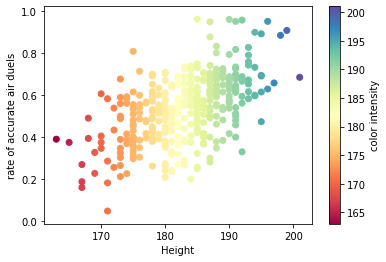

In [38]:
y = info["ratio"]
x = info["height"]
plt.xlabel("Height")
plt.ylabel("rate of accurate air duels")
plt.scatter(x,y , c = info["height"], cmap = 'Spectral' )
cbar = plt.colorbar()
cbar.set_label('color intensity')

As we can see in the scatter plot, as the value of height increases, the value of rate of accurate air duels tend to increase. So there is a positive relationship between these 2 variables

# [RQ6] Free your mind!
For this task, we need to find another interesting result about the dataset we've been working on. 

#### Lefty percentage
We thought about finding some unexpected differences between the percentage of left-footed vs right-footed players, and in particular which role showed the most interesting results.

It's a known fact that 10% of the population is left-handed, while the rest is in majority right-handed and, for a tiny part, ambidextrous. We wonder if being left-footed can be an advantage into the field and where, during a competitive match.


---

Let's start to look at the 'players' dataframe

In [202]:
players.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


We divide this dataframes into 'left' and 'right' dataframes, which got the 'foot' values left and right.

In [203]:
left = pd.DataFrame(players.loc[players['foot'] == 'left'])
left[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48
12,"{'name': 'Mali', 'id': '466', 'alpha3code': 'M...",1992-01-01,null,3795,Charles,left,180,Traor\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",C. Traor\u00e9,74,393284


In [204]:
right = pd.DataFrame(players.loc[players['foot'] == 'right'])
right[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


Now we try to have a general idea about the percentage of left-footed in respect to the players population.

In [205]:
a = len(left.index)
b = len(right.index)

In [206]:
percentage_lefty = str(round(a/(a+b) * 100, 0)) + '%'
percentage_lefty

'24.0%'

We can already notice that this percentage is much more higher than the common value, so there must be some hidden advantage here.

So, we plot the different quantities for every player role.

####  We create the four dataframes for all the possibile roles

In [207]:
def histo(f,g):#plot the histogram for every couple of dataframes
    x = np.arange(2)
    plt.bar(x, height= [f,g] , color = ['red', 'green'])
    plt.xticks(x, ['Left','Right']);
def p(n):#compute the percentage
    return n[0]/(n[0]+n[1]) * 100

In [208]:
defleft = pd.DataFrame(left.loc[left['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])#choosing the right 'role' from the left dataframe
defl = len(defleft.index)#counting the rows
defright = pd.DataFrame(right.loc[right['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])
defr = len(defright.index)
n = [defl, defr]
p(n)

32.151898734177216

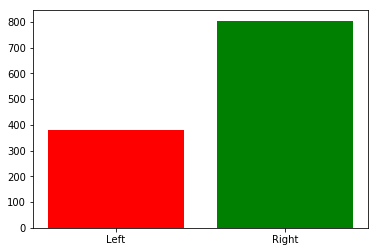

In [209]:
histo(defl, defr)

In [210]:
gkleft = pd.DataFrame(left.loc[left['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkl = len(gkleft.index)
gkright = pd.DataFrame(right.loc[right['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkr = len(gkright.index)
p([gkl,gkr])

13.526570048309178

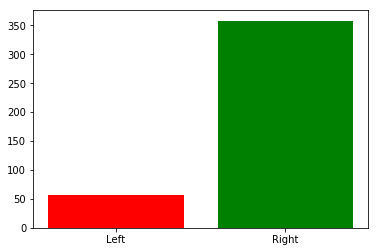

In [211]:
histo(gkl, gkr)

In [212]:
mdleft = pd.DataFrame(left.loc[left['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdright = pd.DataFrame(right.loc[right['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdl = len(mdleft.index)
mdr = len(mdright.index)
p([mdl,mdr])

22.1953188054883

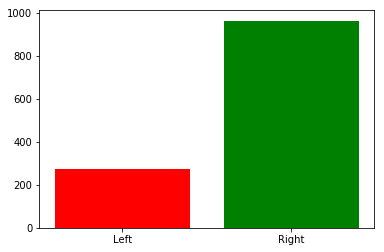

In [213]:
histo(mdl, mdr)

In [214]:
fwleft = pd.DataFrame(left.loc[left['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwright = pd.DataFrame(right.loc[right['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwl = len(fwleft.index)
fwr = len(fwright.index)
p([fwl,fwr])

17.796610169491526

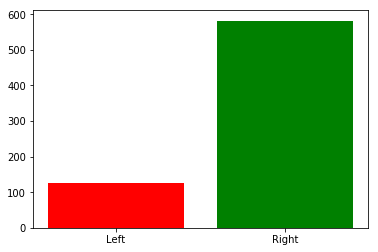

In [215]:
histo(fwl, fwr)

So, we notice that even if the percentages are all over 10%, the only roles where we can see some intersting insights are DF with 32% and MD with 22%.

The main reason might be that defenders and midfielders need to react to the actions of attackers, that are generally right-footed, and so tend to play the ball on the right side during a duel, which is the left side for an observer who is in front of the player, so on his own left.
Therefore, a player that can instictively go left is at advantage against the average stricker.

In fact, the ultimate defender, the GK, doesn't need to be left-footed to win duels, so the percentage returns to more low and common levels. 

# Core Research Questions


# [CRQ1] What are the time slots of the match with more goals?

In [2]:
with open(r"C:\Users\Nino\Desktop\events_England.json") as myfile :
    data = myfile.read()
events = pd.DataFrame(json.loads(data))
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609


Now I want to set different intervals like [0,9) , [9,18) ,... . First I filter the dataset based on the value of match period(1H , 2H) and then in each half of the match create 5 time slots. if the time of the an events is more than 45 minutes in first or second half of the game it should be in E1 or E2 time slot

In [3]:
first = events[events.matchPeriod == "1H"]
slot11 = first[first.eventSec/60 < 9]
s12 = first[first.eventSec/60 >= 9]
slot12 = s12[s12.eventSec/60 < 18]
s13 = first[first.eventSec/60 >= 18]
slot13 = s13[s13.eventSec/60 < 27]
s14 = first[first.eventSec/60 >= 27]
slot14 = s14[s14.eventSec/60 < 36]
s15 = first[first.eventSec/60 >= 36]
slot15 = s15[s15.eventSec/60 <= 45]



second = events[events.matchPeriod == "2H"]
slot21 = second[second.eventSec/60 < 9]
s22 = second[second.eventSec/60 >= 9]
slot22 = s22[s22.eventSec/60 < 18]
s23 = second[second.eventSec/60 >= 18]
slot23 = s23[s23.eventSec/60 < 27]
s24 = second[second.eventSec/60 >= 27]
slot24 = s24[s24.eventSec/60 < 36]
s25 = second[second.eventSec/60 >= 36]
slot25 = s25[s25.eventSec/60 <= 45]



E1 =first[first.eventSec/60 >45]
E2 = second[second.eventSec/60 >45]







In this step we restrict the rows of our datasets to the the ones that contain goal events (tag id = 101

In [4]:
goal11 = slot11[slot11['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal12 = slot12[slot12['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal13 = slot13[slot13['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal14 = slot14[slot14['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal15 = slot15[slot15['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]


goal21 = slot21[slot21['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal22 = slot22[slot22['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal23 = slot23[slot23['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal24 = slot24[slot24['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal25 = slot25[slot25['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]

In [8]:
goalE1 = E1[E1['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goalE2 = E2[E2['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]

The number of goals in each time slot is equal to the number of rows of the dataframe which is related to that time slot. Then for making a bar plot we create a dataframe with indexes equal to time slots and a column of number of goals

In [9]:
data = {"H1[0,9)" :len(goal11.index), "H1[9,18)": len(goal12.index),"H1[18,27)" : len(goal13.index), "H1[27,36)" :len(goal14.index), "H1[36,45]" : len(goal15.index),
              "H2[0,9)" : len(goal21.index),"H2[9,18)" : len(goal22.index), "H2[18,27)" : len(goal23.index), 
            "H2[27,36)" : len(goal24.index), "H2[36,45]" :len(goal25.index), "+45" : len(goalE1.index),"+90" : len(goalE2.index )}
goalTime= pd.DataFrame.from_dict(data, orient='index' , columns=["goals"])
goalTime



,goals
"H1[0,9)",140
"H1[9,18)",152
"H1[18,27)",176
"H1[27,36)",147
"H1[36,45]",175
"H2[0,9)",210
"H2[9,18)",203
"H2[18,27)",207
"H2[27,36)",231
"H2[36,45]",217


now we create a barplot which shows the number of goals in each time slot

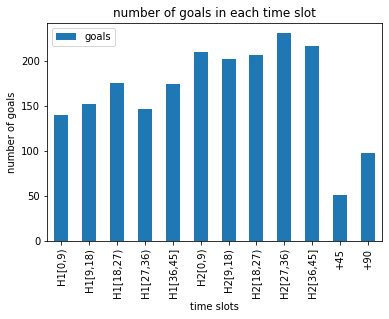

In [10]:
goalTime.plot.bar(title = 'number of goals in each time slot')
plt.xlabel('time slots')
plt.ylabel('number of goals')
plt.show()

In [ ]:
m = (goal25["teamId"].value_counts()).head(10)
m

# Second Part

Now we want to Find the top 10 teams that scored the most in the interval [81-90). the data set related to that time slot is goal25, so we start our analysis on this dataset. we can count the number of rows that each teamId has on the goal25 dataset

In [11]:
m = (goal25["teamId"].value_counts()).head(10)
m

1609     16
1644     16
1625     15
1633     15
1628     13
1610     13
1623     12
10531    12
1659     11
1639     11
Name: teamId, dtype: int64

To make our results more organized, I put it in a dataframe and also add a name column to the dataframe

In [12]:
top10 = pd.DataFrame({'wyId' : m.index ,'goals' : m.values})
top10

,wyId,goals
0,1609,16
1,1644,16
2,1625,15
3,1633,15
4,1628,13
5,1610,13
6,1623,12
7,10531,12
8,1659,11
9,1639,11


if we want to check the name of these teams we should use teams database, so I load it 

In [13]:
with open(r"C:\Users\Nino\Desktop\teams.json") as myfile :
    data = myfile.read()
teams = pd.DataFrame(json.loads(data))
teams.head(3)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691


 I use merge function to extract the rows of teams dataframe that has same wyId as top10 datafeame and the put the name column value of those rows in name column of top10 dataframe

In [14]:
top10["name"] = top10.merge(teams, on = "wyId")["name"]
top10

,wyId,goals,name
0,1609,16,Arsenal
1,1644,16,Watford
2,1625,15,Manchester City
3,1633,15,West Ham United
4,1628,13,Crystal Palace
5,1610,13,Chelsea
6,1623,12,Everton
7,10531,12,Swansea City
8,1659,11,AFC Bournemouth
9,1639,11,Stoke City


# Third part

In this part we want to know if there are players that were able to score at least one goal in 8 different intervals. My strategy in this part is to create a data frame which contains playerIds and 12 columns with boolean values, and the value is true if the player scored in that time slot 

In [15]:
goals = events[events['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goals

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
46,10,Shot,94.595788,177959212,2499719,1H,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
47,9,Save attempt,96.970614,177959226,2499719,1H,8480,"[{'y': 100, 'x': 100}, {'y': 59, 'x': 12}]",90,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",1631
91,10,Shot,254.745027,177959280,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
92,9,Save attempt,256.547834,177959249,2499719,1H,7882,"[{'y': 0, 'x': 0}, {'y': 48, 'x': 4}]",90,Reflexes,"[{'id': 101}, {'id': 1207}, {'id': 1802}]",1609
554,10,Shot,1710.855093,177959759,2499719,1H,12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1631
555,9,Save attempt,1712.908250,177959773,2499719,1H,7882,"[{'y': 0, 'x': 0}, {'y': 46, 'x': 6}]",90,Reflexes,"[{'id': 101}, {'id': 1203}, {'id': 1802}]",1609
898,10,Shot,2815.900791,177960130,2499719,1H,7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
899,9,Save attempt,2817.604704,177960121,2499719,1H,8480,"[{'y': 100, 'x': 100}, {'y': 50, 'x': 8}]",90,Reflexes,"[{'id': 101}, {'id': 1203}, {'id': 1802}]",1631
1107,10,Shot,634.312236,177960379,2499719,2H,12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
1108,9,Save attempt,636.247679,177960316,2499719,2H,7882,"[{'y': 0, 'x': 0}, {'y': 46, 'x': 8}]",90,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",1609


First, I create a dataframe with playerIds from goasl dataframe

In [16]:
a = pd.DataFrame(goals.playerId.unique(),columns = ["playerId"])
a

,playerId
0,25413
1,8480
2,14763
3,7882
4,12829
5,7945
6,7870
7,26010
8,8325
9,61390


and then I add 12 column with boolean values

In [17]:
a["goal1"] = a.playerId.isin(goal11.playerId)
a["goal2"] = a.playerId.isin(goal12.playerId)
a["goal3"] = a.playerId.isin(goal13.playerId)
a["goal4"] = a.playerId.isin(goal14.playerId)
a["goal5"] = a.playerId.isin(goal15.playerId)
a["goal6"] = a.playerId.isin(goal21.playerId)
a["goal7"] = a.playerId.isin(goal22.playerId)
a["goal8"] = a.playerId.isin(goal23.playerId)
a["goal9"] = a.playerId.isin(goal24.playerId)
a["goal10"]= a.playerId.isin(goal25.playerId)
a["goal11"]= a.playerId.isin(goalE1.playerId)
a["goal12"]=a.playerId.isin(goalE2.playerId)

In [18]:
a

,playerId,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12
0,25413,True,True,True,False,False,True,False,True,True,True,True,False
1,8480,True,True,True,True,True,True,True,True,True,True,True,True
2,14763,True,False,False,True,False,True,False,True,False,False,True,False
3,7882,True,True,True,True,True,True,True,True,True,True,False,True
4,12829,True,True,True,True,True,True,True,True,True,True,False,True
5,7945,True,False,False,False,True,True,False,False,False,True,True,False
6,7870,True,False,True,False,False,False,True,False,True,True,False,False
7,26010,False,False,False,True,False,False,False,True,True,True,False,False
8,8325,False,False,True,True,False,True,True,True,True,True,False,False
9,61390,True,True,True,True,True,True,True,True,True,True,True,True


In [19]:
x = a.sum(axis = 1)
x.head(5)

0    25421.0
1     8492.0
2    14768.0
3     7893.0
4    12840.0
dtype: float64

If I use sum(axis = 1) function, it is gonna calculate the sum value in each row. If we subtract the player Id from it we are gonna reach the total number of Trues or total number of time slots that a player scored in. so we do that and filter our dataframe to player Ids that have scored in 8 time slots or more

In [20]:
b = a[a.sum(1)-a.playerId>=8]
b

,playerId,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12
0,25413,True,True,True,False,False,True,False,True,True,True,True,False
1,8480,True,True,True,True,True,True,True,True,True,True,True,True
3,7882,True,True,True,True,True,True,True,True,True,True,False,True
4,12829,True,True,True,True,True,True,True,True,True,True,False,True
9,61390,True,True,True,True,True,True,True,True,True,True,True,True
11,3429,True,True,True,False,True,True,True,True,True,True,True,True
13,3324,True,True,False,True,True,True,True,True,True,True,False,False
16,8425,True,True,True,True,True,True,True,True,True,True,False,True
19,8094,True,True,True,True,True,True,True,True,True,True,True,False
20,7905,True,False,True,True,True,True,True,True,True,True,False,False


In [21]:
len(b.index)

37

so there are 37 players that scored in at least 8 time slots

# [CRQ2] Visualize movements and passes on the pitch!

Here we will focus our attention on the ares that a player covers during a match. In fact, for each event of the 'events' dataframe, we have a pair of coordinates that represent the starting point and the end point of an action.

This task is divided into 2 different types of visualizations, an heat map and a heat and arrow map.

### 1. Cristiano Ronaldo vs Leonél Messi

Here, we will cover only the match Barcelona - Real Madrid played on the 6 May 2018.

In [3]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch


Let's define some functions that we will use later.

In [4]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

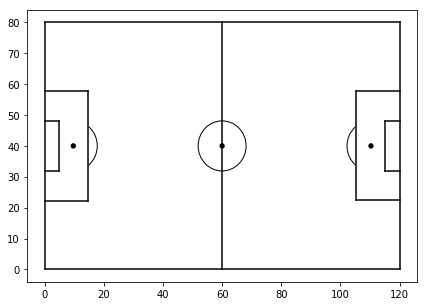

In [5]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [6]:
#Function to plot the heat map
def green(d):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    #Coordinate of player starting position
    x_coord = [i[0]['x']*1.2 for i in d["positions"]]
    y_coord = [i[0]['y']*0.8 for i in d["positions"]]
    plt.ylim(80, 0) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30);

In [7]:
#We define the tagg function, that will create a list of all the numbers associate with 'id'
def tagg(x):
    v = []
    for i in range(len(x)):
        v.append(x.iloc[i])
    for i in range(len(v)):
        v[i] = [d['id'] for d in v[i]]
    return v

In [8]:
#Function to plot the heat map with the arrow map in the second part of the task
def calcio(d, v):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)#We draw the field
    plt.axis('off')#We get rid of axis
    
    #These are the starting positions we need for the heat map
    x_coord = [i[0]['x']*1.2 for i in d["positions"]]
    y_coord = [i[0]['y']*0.8 for i in d["positions"]]

    for i in range(len(d)):
        # can also differentiate by color
        color = 'blue' if 1801 in v[i] else 'red'#red if pass is inaccurate
        #We print the arrows,using the start and the end positions of each event
        ax.annotate("", xy = ((d.iloc[i]['positions'][1]['x'])*1.2, (d.iloc[i]['positions'][1]['y'])*0.8), xycoords = 'data',
                   xytext = ((d.iloc[i]['positions'][0]['x'])*1.2, (d.iloc[i]['positions'][0]['y'])*0.8), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    #This print the heat map
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(80, 0) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    return plt.show()
    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos

Let's start opening the json files and creating the dataframes that we need.

In [9]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Spain.json', 'r') as myfile:
    data = myfile.read()
m = json.loads(data)
Spain = pd.DataFrame(m)

Now, we search for the players that we need: Cristiano Ronaldo and Leonél Messi.

In [10]:
players.loc[players['firstName'] == 'Cristiano Ronaldo']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",1985-02-05,9905,3159,Cristiano Ronaldo,right,187,dos Santos Aveiro,,"{'name': 'Portugal', 'id': '620', 'alpha3code'...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Cristiano Ronaldo,83,3322


In [11]:
players.loc[players['lastName'] == 'Messi Cuccittini']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
207,"{'name': 'Argentina', 'id': '32', 'alpha3code'...",1987-06-24,12274,676,Lionel Andr\u00e9s,left,170,Messi Cuccittini,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",L. Messi,72,3359


#### Let's start analyzing Cristiano Ronaldo

These are all of the Ronaldo's actions during the La Liga season.

In [12]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Spain.json', 'r') as myfile:
    data = myfile.read()
e = json.loads(data)
events = pd.DataFrame(e)

In [13]:
criact = events.loc[events['playerId'] == 3322]
criact.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
76412,1,Duel,28.108732,189337977,2565596,1H,3322,"[{'y': 26, 'x': 96}, {'y': 27, 'x': 91}]",11,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",675
76414,10,Shot,31.052085,189337978,2565596,1H,3322,"[{'y': 27, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...",675
76457,8,Pass,146.902499,189338004,2565596,1H,3322,"[{'y': 53, 'x': 68}, {'y': 67, 'x': 53}]",85,Simple pass,[{'id': 1801}],675
76589,10,Shot,548.744061,189338889,2565596,1H,3322,"[{'y': 48, 'x': 96}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",675
76654,1,Duel,713.899672,189338224,2565596,1H,3322,"[{'y': 84, 'x': 62}, {'y': 81, 'x': 42}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",675


In [14]:
criact['eventName'].unique()

array(['Duel', 'Shot', 'Pass', 'Others on the ball', 'Foul', 'Free Kick',
       'Offside'], dtype=object)

#### Now, we consider only the 'eventName' values that we need

So, we search for: 'Duel', 'Shot', 'Pass' and 'Free Kick'.

In [15]:
a = pd.concat([criact.loc[criact['eventName'] == 'Duel'], criact.loc[criact['eventName'] == 'Shot'], criact.loc[criact['eventName'] == 'Pass'], criact.loc[criact['eventName'] == 'Free Kick']])

In [16]:
b = a.loc[a['matchId'] == 2565907]#Choosing the right match
b = b.reset_index(drop=True)#reindexing
b.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,68.618689,249644112,2565907,1H,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",13,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",675
1,1,Duel,69.411334,249644113,2565907,1H,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",675
2,1,Duel,114.548692,249644119,2565907,1H,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",12,Ground defending duel,"[{'id': 701}, {'id': 1802}]",675
3,1,Duel,275.327960,249644145,2565907,1H,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675
4,1,Duel,403.870069,249644178,2565907,1H,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675


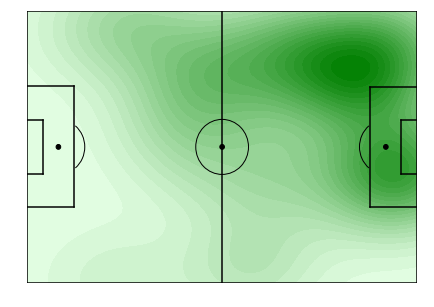

In [18]:
green(b)#Cristiano Ronaldo is a LF so we adjusted the plt.ylim to (80,0) in order to put him into the right position on the field.

#### Let's do the same analysis on Leonél Messi

In [19]:
messact = events.loc[events['playerId'] == 3359]

In [20]:
m = pd.concat([messact.loc[messact['eventName'] == 'Duel'], messact.loc[messact['eventName'] == 'Shot'], messact.loc[messact['eventName'] == 'Pass'], messact.loc[messact['eventName'] == 'Free Kick']])

In [21]:
rb = m.loc[m['matchId'] == 2565907]
rb = rb.reset_index(drop=True)
rb.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,122.168204,249644589,2565907,1H,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",11,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",676
1,1,Duel,294.661951,249644634,2565907,1H,3359,"[{'y': 57, 'x': 36}, {'y': 60, 'x': 34}]",13,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",676
2,1,Duel,429.449101,249644663,2565907,1H,3359,"[{'y': 62, 'x': 42}, {'y': 57, 'x': 36}]",11,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",676
3,1,Duel,432.507881,249644665,2565907,1H,3359,"[{'y': 69, 'x': 37}, {'y': 66, 'x': 41}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",676
4,1,Duel,693.128014,249644730,2565907,1H,3359,"[{'y': 43, 'x': 44}, {'y': 33, 'x': 35}]",13,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",676


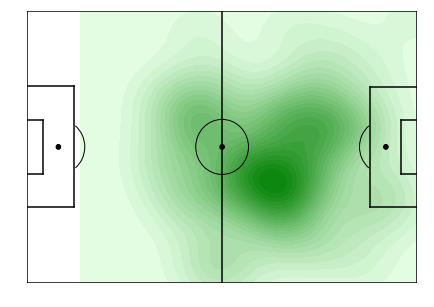

In [22]:
green(rb)

### Comments

By looking at the two plots, there are clearly strong differences:
1. Cristiano Ronaldo has been particularly active in two zones of the field, one inside and the other right outside the main area. Instead, Messi has only focused his game into the advanced midfield, a small and less dengerous place, during the match.
2. Cristiano Ronaldo has been moving all around the field, reaching areas outside his main zones.

This means that the defense of the Real Madrid was able to limit the movements of Messi and relegate him to a small area of the field, instead Cristiano Ronaldo, maybe thanks to his strenght and physique, has been a tough opponent for the Barcelona defence, in fact he managed to attack directly the goalkeeper.

### 2. Miralem Pjanic vs Jorginho
Let's start creating the Italy dataset, since Juventus and Napoli are two teams of Serie A.

In [23]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Italy.json', 'r') as myfile:
    data = myfile.read()
i = json.loads(data)
Italy = pd.DataFrame(i)
Italy.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329
3,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",,3165,2576330
4,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",,3163,2576331


We need the wyId code to find this match even in 'events' dataset, to choose the players actions of the right match.

In [24]:
Italy.loc[Italy['label'] == 'Juventus - Napoli, 0 - 1']

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
41,524,"April 22, 2018 at 8:45:00 PM GMT+2",2018-04-22 18:45:00,Regular,34,"Juventus - Napoli, 0 - 1","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",,3187,2576295


The match Juventus - Napoli has wyId: 2576295

#### Miralem Pjanic plot of passes

Now we can search for the player Miralem Pjanic in the 'players' dataset, we need his wyId code.

In [25]:
pia = players.loc[players['firstName'] == 'Miralem']
pia

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1482,"{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",1990-04-02,null,3159,Miralem,right,180,Pjani\u0107,,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Pjani\u0107,74,20443


#### Making the heat-arrow plot

In [26]:
#Opening and loading the json file 'events_Italy'
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Italy.json', 'r') as myfile:
    data = myfile.read()
evit = json.loads(data)
Itaev = pd.DataFrame(evit)#Creating a pandas dataframe

In [27]:
#These are all the passes of Pjanic during the match
Pjanic = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 20443) & (Itaev['eventName'] == 'Pass')]
Pjanic.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
573220,8,Pass,352.941005,245487509,2576295,1H,20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",85,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",3159
573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159


In this visualization, we will plot the heat map and the arrow map concurrently, highlightning the accurate passes and the inaccurate ones.

In [28]:
tag = Pjanic['tags']#This is the 'tags' column that we will transform into a list of values
tag.head()

573105                                [{'id': 1801}]
573107                                [{'id': 1801}]
573126                  [{'id': 1401}, {'id': 1801}]
573220    [{'id': 1401}, {'id': 1001}, {'id': 1802}]
573225                                [{'id': 1801}]
Name: tags, dtype: object

In [29]:
v = tagg(tag)#Function described above
v[:5]

[[1801], [1801], [1401, 1801], [1401, 1001, 1802], [1801]]

Now, we can verify if a pass has been accurate or not by looking at the tag number 1801 for each event.

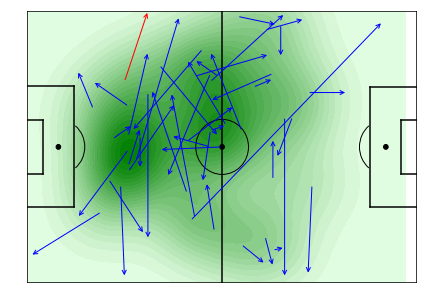

In [30]:
calcio(Pjanic,v)#As explained in the definition of this function, the blue arrows are accurate passes, while the red ones are inaccurate.

#### Jorginho plot of passes

In [31]:
jor = players.loc[players['firstName'] == 'Jorge Luiz'] #Searching for the wyId code of the player
jor

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1658,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1991-12-20,3757,3187,Jorge Luiz,right,180,Frello Filho,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


In [32]:
#Choosing only the event 'Pass'
Jorginho = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 21315) & (Itaev['eventName'] == 'Pass')]
Jorginho.head() 

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573145,8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187
573164,8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187
573188,8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187
573231,8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187
573237,8,Pass,456.587989,245487506,2576295,1H,21315,"[{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]",85,Simple pass,[{'id': 1801}],3187


In [33]:
tagj = Jorginho['tags']
tagj.head()

573145                  [{'id': 1801}]
573164    [{'id': 1401}, {'id': 1802}]
573188                  [{'id': 1801}]
573231                  [{'id': 1801}]
573237                  [{'id': 1801}]
Name: tags, dtype: object

In [34]:
w = tagg(tagj)
w[:5]

[[1801], [1401, 1802], [1801], [1801], [1801]]

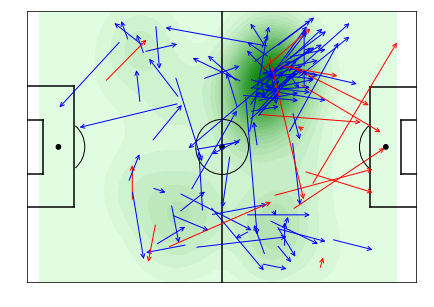

In [35]:
calcio(Jorginho,w)#As explained in the definition of this function, the blue arrows are accurate passes, while the red ones are inaccurate.

### Comments

By looking at the heat maps, we can clearly notice that even if both are midfielders, Jorginho is in a much more advanced position than Pjanic. The difference in the number of passes between the two players is once again on Jorginho's side, even though Pjanic manages to overcome it in terms of precision, with only one inaccurate pass. However, all the inaccurate passages of Jorginho are at least towards the attack area, while Pjanic not only never approached there, but none of his passes seems to be able to reach the area. So, going to look at the game statistics linked to the track of this exercise, we observe a 60% possession of Napoli, and one of 40% of Juventus, therefore, since the victory belongs to Napoli, perhaps it would have been better to concentrate on the quantity of forward passes, and not just on their accuracy.